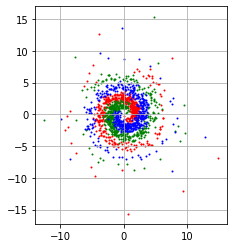

In [1]:
%matplotlib inline


import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import lognorm, norm


n = 500
dr = 10
nrot = 2
k = (nrot * 2 * np.pi) / dr


r = lognorm.rvs(0.5, scale=3, size=(n, 3))
phi = np.random.normal(scale=np.pi / 5, size=(n, 3))
phi_init = 17
phi_shift = np.array([phi_init, phi_init + np.pi / 3 * 2, phi_init + np.pi / 3 * 4])
phi = phi + phi_shift + r * k
x = r * np.cos(phi)
y = r * np.sin(phi)

colors = ['red', 'green', 'blue']
for c, xx, yy in zip(colors, x.T, y.T):
    plt.scatter(xx, yy, color=c, s=1)

plt.grid()
plt.gca().set_aspect('equal')

In [2]:
data = np.zeros([0, 3])

for i in range(3):
    data = np.r_[
        data,
        np.c_[x[:, i:i+1], y[:, i:i+1], np.full([n, 1], i)]
    ]

np.random.shuffle(data)

In [3]:
spiral_df = pd.DataFrame(data=data, columns=['x', 'y', 'class'])
spiral_df['class'] = spiral_df['class'].apply(int)

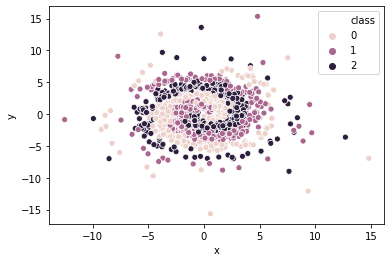

In [4]:
sns.scatterplot(data=spiral_df, x='x', y='y', hue='class')

In [5]:
train_size = 1000
spiral_train = spiral_df.iloc[:train_size, :]
spiral_test = spiral_df.iloc[train_size:, :]

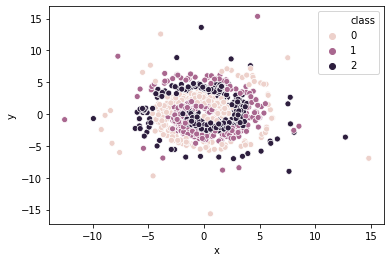

In [6]:
sns.scatterplot(data=spiral_train, x='x', y='y', hue='class')

In [7]:
os.makedirs('spiral', exist_ok=True)

In [8]:
spiral_train.to_csv('spiral/train.csv')
spiral_test.to_csv('spiral/test.csv')

In [9]:
spiral_df.to_csv('spiral/all.csv', index=False)

In [10]:
spiral_train

,x,y,class
0,2.194794,-0.012664,0
1,1.458467,1.361400,0
2,2.998156,1.285721,2
3,1.979039,5.371268,1
4,2.169023,-0.017729,2
...,...,...,...
995,3.247404,-1.347144,2
996,1.449933,-1.692932,2
997,1.864956,0.894446,0
998,-0.456225,-1.663811,2


In [11]:
spiral_test

,x,y,class
1000,-1.307534,2.349040,0
1001,-1.054872,-0.645319,2
1002,-3.703471,-2.444059,0
1003,3.848379,-0.483968,1
1004,-3.742755,9.689459,2
...,...,...,...
1495,-0.171567,-1.897398,2
1496,-1.639830,1.020697,1
1497,0.986606,1.142048,0
1498,0.435708,-3.008997,1
